### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.filtertools import convolution_filter
from statsmodels.tsa.seasonal import _extrapolate_trend
import pandas as pd
import numpy as np

In [2]:
sunspots = sm.datasets.sunspots.load_pandas()
air = pd.read_csv('C:/Users/oyeye/Downloads/try-it_10_1_starter/data/AirPassengers.csv')

# Load Sunspots Data

In [3]:
sunspots = sm.datasets.sunspots.load_pandas().data

In [4]:
sunspots.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


<AxesSubplot:xlabel='YEAR'>

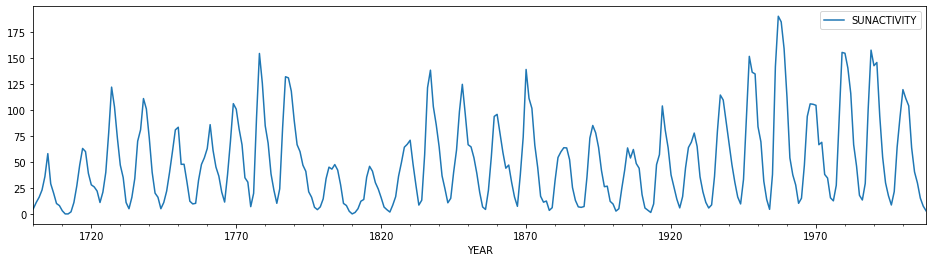

In [5]:
sunspots['YEAR'] = sunspots['YEAR'].astype(int)
sunspots = sunspots.set_index(pd.to_datetime(sunspots['YEAR'], format = '%Y')).drop('YEAR', axis = 1)
sunspots.plot(figsize = (16, 4))

# Split into Historical and Future Data

In [6]:
y_hist = sunspots.loc['1700':'1969','SUNACTIVITY']
y_future = sunspots.loc['1970':'2008','SUNACTIVITY']

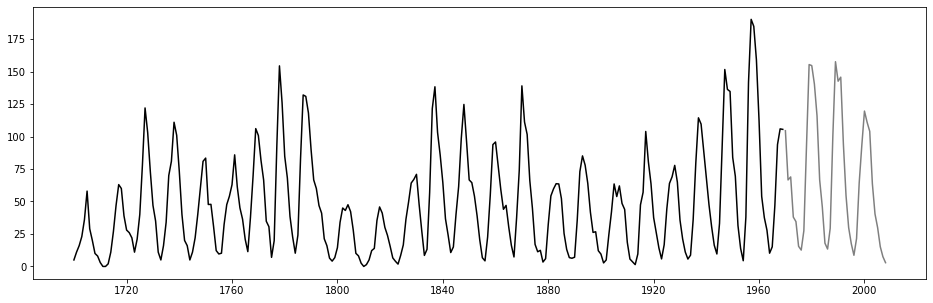

In [7]:
plt.figure(figsize = (16,5))
plt.plot(y_hist,'k')
plt.plot(y_future,'k',alpha=0.5)

In [8]:
period = 128

filt = np.ones(period+1)
filt[0] = 0.5
filt[-1] = 0.5
filt /= period

In [9]:
trend = convolution_filter(y_hist, filt)
trend = _extrapolate_trend(trend, period + 1)

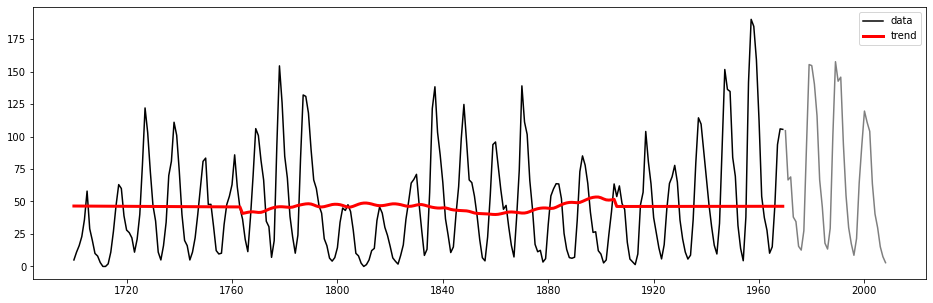

In [10]:
plt.figure(figsize = (16,5))
plt.plot(y_hist,'k',label = 'data')
plt.plot(trend,'r',linewidth=3,label='trend')
plt.plot(y_future,'k',alpha=0.5)
plt.legend()

In [11]:
detrended = y_hist - trend
detrended = detrended.to_numpy()

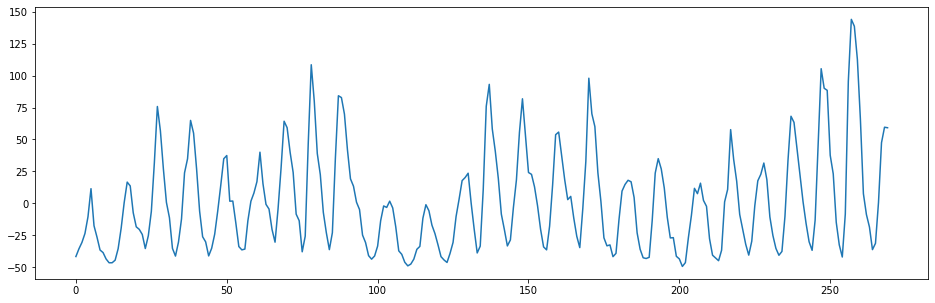

In [12]:
plt.figure(figsize=(16,5))
plt.plot(detrended)

<AxesSubplot:xlabel='YEAR'>

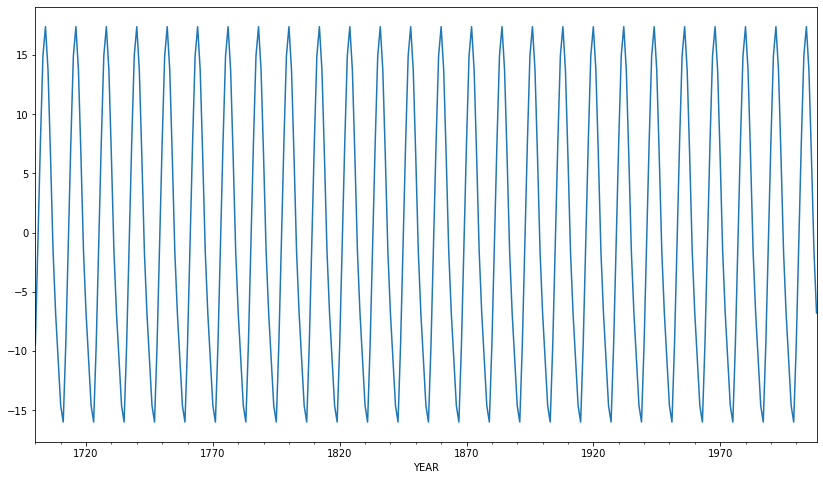

In [22]:
result = seasonal_decompose(sunspots['SUNACTIVITY'], model = 'additive', period = 12)
result.seasonal.plot(figsize = (14, 8))

<AxesSubplot:xlabel='YEAR'>

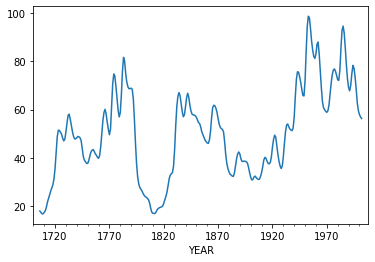

In [23]:
result.trend.plot()

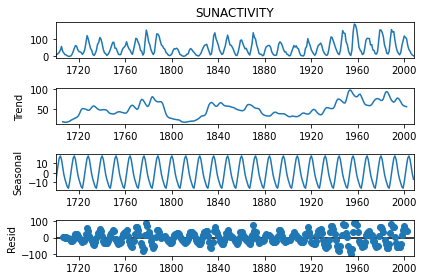

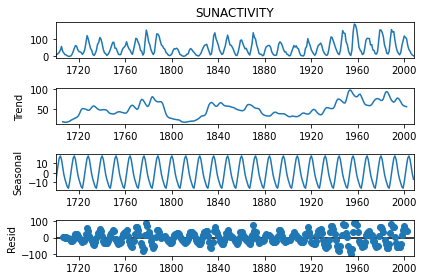

In [26]:
result.plot()

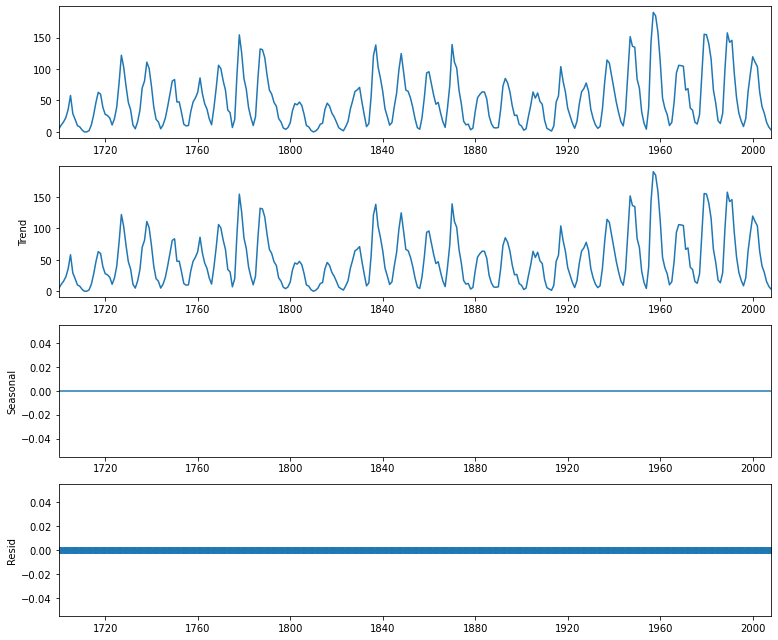

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(sunspots, model='additive')
fig = decomposition.plot()
plt.show()

In [61]:
df = pd.DataFrame(y_hist)
df

,SUNACTIVITY
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0
...,...
1965-01-01,15.1
1966-01-01,47.0
1967-01-01,93.8


In [28]:
air.head(15)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [29]:
air.set_index('Month', inplace = True)
air.index = pd.to_datetime(air.index)

<AxesSubplot:xlabel='Month'>

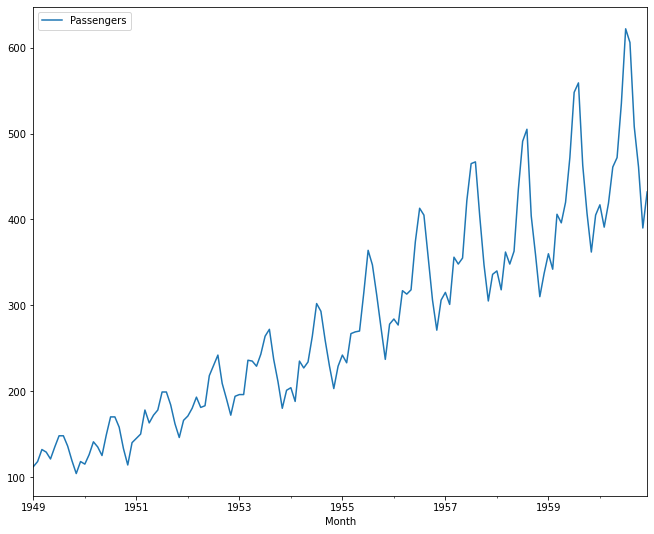

In [33]:
air.plot()

<AxesSubplot:xlabel='Month'>

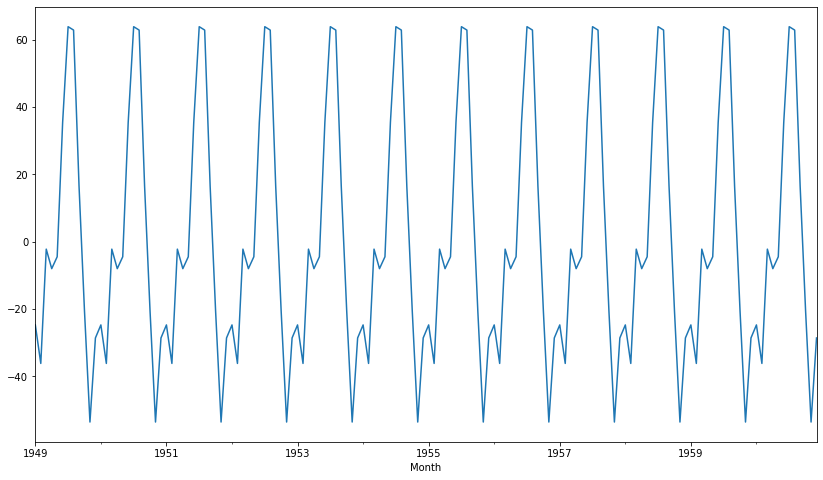

In [34]:
result = seasonal_decompose(air['Passengers'], model = 'additive', period = 12)
result.seasonal.plot(figsize = (14, 8))

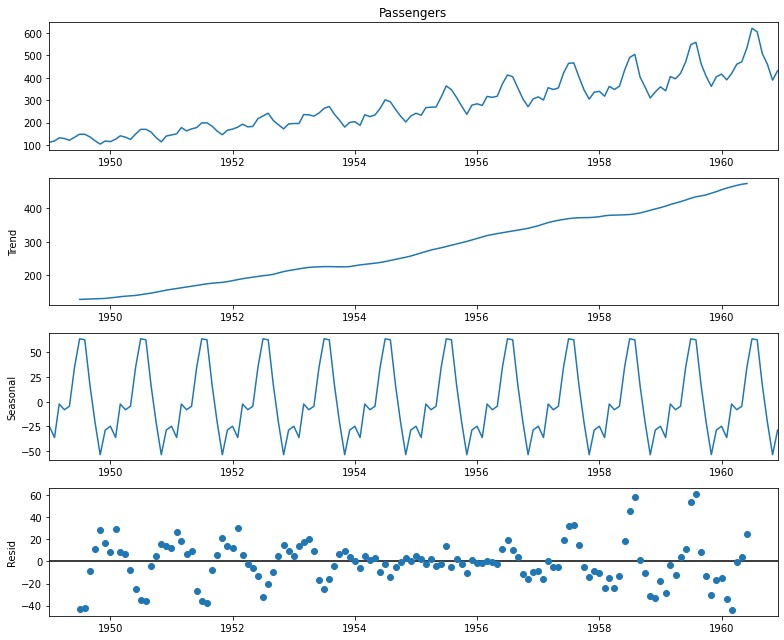

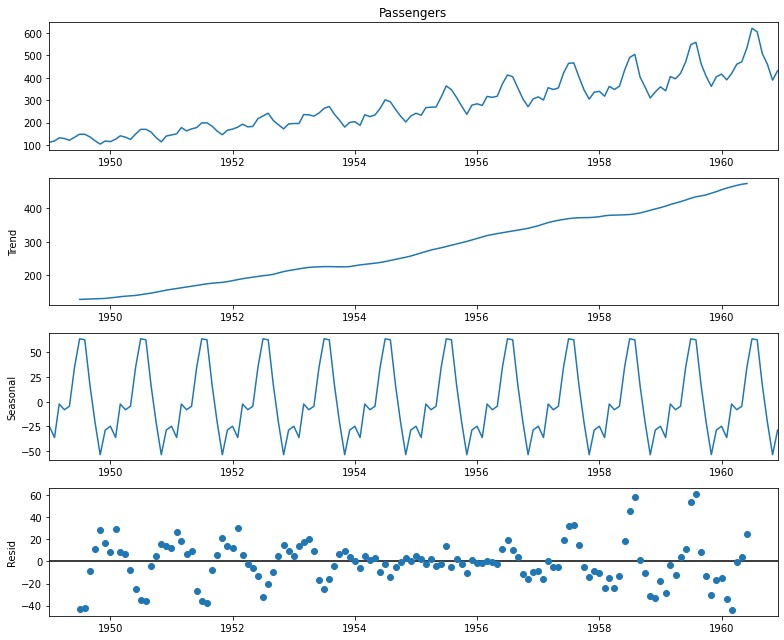

In [35]:
result.plot()